---------------------------------------------------------------------
         
## Amostragem Simples

---------------------------------------------------------------------

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm, skewnorm
from scipy.stats import norm
from scipy import stats
from math import ceil
from sklearn.model_selection import train_test_split

In [ ]:
# Carregando o arquivo
df = pd.read_csv("iris.csv")
# Mostrando o arquivo
df.head(5)

In [ ]:
# Estabelecer uma semente aleatória para manutenção do resultado
np.random.seed(2345)

#150 Amostras | 0 a 1 | Reposição | prob. equivalentes
amostra = np.random.choice(a = [0,1], size = 150, replace = True,
                          p = [0.7,0.3])

In [ ]:
len(amostra) #tamanho da amostra

In [ ]:
print (len(amostra==1), len(amostra==0)) #vendo qtos de 1 e qtos de 0

In [ ]:
basefinal1 = df.loc[amostra==0]
basefinal2 = df.loc[amostra==1]

In [ ]:
print(basefinal1.shape, " | ", basefinal2.shape)

---------------------------------------------------------------------

## Amostragem Estratificada

---------------------------------------------------------------------

In [ ]:
df['class'].value_counts()

In [ ]:
#iris.iloc [:, 0:4] - Atributos previsores (informações da planta - características)
#iris.iloc [:, 4] a classe a ser prevista (setosa, virginica ou versicolor)
# para testar a base selecionamos -> 0.5 (50%), por isso o _ para os outros valores
# retornar a amostra se baseando na classe

X, _, y, _ = train_test_split(df.iloc[:, 0:4], 
                              df.iloc[:, 4],         
                              test_size=0.5, 
                              stratify = df.iloc[:, 4])

y.value_counts()

 > Outro dataset - Infert

In [ ]:
infert = pd.read_csv('infert.csv')

infert.head(5)

In [ ]:
infert.describe().T

In [ ]:
infert['education'].value_counts()

In [ ]:
# amostra com apenas 40% dos registros
# teste com 60%
X1, _, y1, _ = train_test_split(infert.iloc[:, 2:9], infert.iloc[:, 1],
                                test_size=0.6, stratify= infert.iloc[:, 1])
y1.value_counts()

---------------------------------------------------------------------

## Amostragem Sistemática

---------------------------------------------------------------------

In [ ]:
pop = 150
amostra = 15

# para obter uma amostra de 15, precisamentos selecionar um a cada 10
k = ceil(pop/amostra)

#resultado = 10
print(k)

In [ ]:
# definição do valor aleatório p/ inicar a amostrar
# vai de 1 até k +1

r = np.random.randint(low = 1, high = k + 1, size = 1)

print(r)

In [ ]:
# For que somará os próximos valores
# baseado no 1º valor de r definido acima

acumulador = r[0]
sorteados = []

for i in range(amostra):
    sorteados.append(acumulador)
    acumulador += k
    
print(len(sorteados))
print(sorteados)

In [ ]:
# carregando a base final para carregar o método 

df.loc[sorteados]

---------------------------------------------------------------------

## Centralidade e Variabilidade

---------------------------------------------------------------------

In [ ]:
# criando variável com o salário dos funcionários do setor de uma empresa
sal_trab = [7200, 1100, 3400, 11000, 22000, 2700, 3000, 6500, 6200, 8000, 6200, 860, 860, 860, 7200]

print('A média é:' , np.mean(sal_trab))
print('A mediana é:' , np.median(sal_trab))

#Criando e gerando os quartis:
quartis = np.quantile(sal_trab, [0 , 0.25 , 0.50 , 0.75, 1])
print('Os quartis são (0%, 25%, 50%, 75% e 100%)   ->  ', quartis)
print ( 'O desvio padrão do salário dos funcionário é: : ' , np.std(sal_trab, ddof = 1))

In [ ]:
# descrição pela função do metodos stats
stats.describe(sal_trab)

---------------------------------------------------------------------
## Distribuição normal
---------------------------------------------------------------------

In [ ]:
# Conjunto de objetos em uma cesta
# A média é 8 e o desvio padrão é 2
# Qual a chance de eu pegar um obj com menos de 6kg
menorq = norm.cdf(6, 8, 2) #  menor que | média | desvpad

# Pegar um com mais de 6kg
mairq = 1 - norm.cdf(6, 8, 2) #  menor que | média | desvpad

#Obj menor que 6kg ou um maior que 10kg:
maioroumenorq = menorq + norm.sf(10,8,2)

#menor que 10 e maior que 8
menorqmaiorq = norm.cdf(10, 8, 2) - norm.sf(8,8,2)

print('- Menor q 6kg: ', menorq)
print('- Maior que: ', mairq)
print('- Obj menor que 6kg ou um maior que 10kg: ', maioroumenorq)
print('- Menor que 10 e maior que 8: ', menorqmaiorq )

---------------------------------------------------------------------
## Teste de Distribuição Normal
---------------------------------------------------------------------

In [ ]:
dados = norm.rvs(size=1000)
#dados

In [ ]:
plt.hist(dados, bins=20);
plt.title('Dados');

In [ ]:
#cria grafico
fig, ax = plt.subplots()
stats.probplot(dados, fit=True, plot=ax)
plt.show()

> Dados não normais

Text(0.5, 1.0, 'Dados')

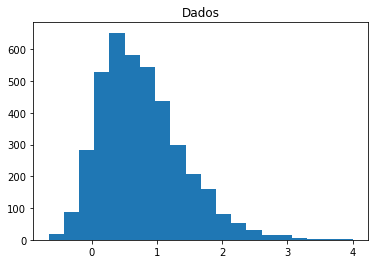

In [26]:
dados2 = skewnorm.rvs(4,size=4000)

plt.hist(dados2, bins=20);
plt.title('Dados')                    

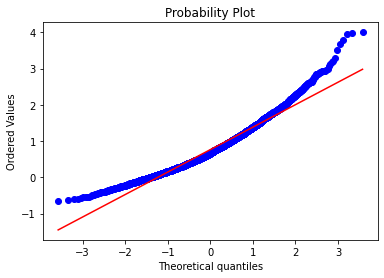

In [29]:
fig, ax = plt.subplots()
stats.probplot(dados2,fit=True, plot=ax)
plt.show()

In [30]:
stats.shapiro(dados2)

ShapiroResult(statistic=0.961395800113678, pvalue=2.170037097959785e-31)